In [1]:
#Nota la base tenia mas de 800 000 registros y pesaba casi 700 megas por lo que solo pude ocupar 10 000 para el proyecto
import json
import requests
import feedparser
import pymysql
from sqlalchemy import create_engine
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import random

In [2]:
users_columns = pd.read_csv('CIPGJ_ordenado_limpio.csv')
users_columns

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,datasetid,delito,categoria_delito,fecha_hechos,fecha_inicio,alcaldia_hechos,agencia,fiscalia,unidad_investigacion,colonia_hechos,calle_hechos,Esquina,mes_hechos
0,0,0,0,0,carpetas-de-investigacion-pgj-cdmx,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,2016-05-01 21:00:00,2016-05-03 00:36:45,MIGUEL HIDALGO,MH-2,INVESTIGACIÓN EN MIGUEL HIDALGO,UI-2CD,LOMAS DE SOTELO,PRESA DE LA AMISTAD,PRESA DON MARTIN,Mayo
1,1,1,1,1,carpetas-de-investigacion-pgj-cdmx,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,DELITO DE BAJO IMPACTO,2016-05-02 20:10:00,2016-05-03 01:18:21,VENUSTIANO CARRANZA,VC-3,INVESTIGACIÓN EN VENUSTIANO CARRANZA,UI-1SD,GENERAL IGNACIO ZARAGOZA,AV. JESUS GALINDO Y VILA,CALLE 9 (SIN REGISTRO DEL SAP),Mayo
2,2,2,2,2,carpetas-de-investigacion-pgj-cdmx,FRAUDE,DELITO DE BAJO IMPACTO,2015-06-19 12:00:00,2016-05-03 01:39:26,CUAUHTEMOC,CUH-8,INVESTIGACIÓN EN CUAUHTEMOC,UI-2SD,DOCTORES,RIO DE LA LOZA,NaN,Junio
3,3,3,3,3,carpetas-de-investigacion-pgj-cdmx,LESIONES INTENCIONALES POR GOLPES,DELITO DE BAJO IMPACTO,2016-05-01 13:00:00,2016-05-03 01:47:04,VENUSTIANO CARRANZA,VC-2,INVESTIGACIÓN EN VENUSTIANO CARRANZA,UI-1SD,MOCTEZUMA 2A SECCIÓN,ORIENTE 178,NTE. 21 (SIN REGISTRO DEL SAP),Mayo
4,4,4,4,4,carpetas-de-investigacion-pgj-cdmx,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,2016-05-02 17:00:00,2016-05-03 02:06:35,IZTAPALAPA,IZP-9,INVESTIGACIÓN EN IZTAPALAPA,UI-2SD,ZONA URBANA EJIDAL SANTA MARIA AZTAHUACAN,GUELATAO,NaN,Mayo
5,5,5,5,5,carpetas-de-investigacion-pgj-cdmx,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,2016-05-02 21:00:00,2016-05-03 02:48:06,IZTACALCO,IZC-1,INVESTIGACIÓN EN IZTACALCO,UI-2SD,SAN MIGUEL,CALLEJON CUITLAHUAC,NaN,Mayo
6,6,6,6,6,carpetas-de-investigacion-pgj-cdmx,DESPOJO,DELITO DE BAJO IMPACTO,2016-04-01 07:00:00,2016-05-03 02:58:36,CUAUHTEMOC,CUH-4,INVESTIGACIÓN EN CUAUHTEMOC,UI-2SD,CENTRO,TOMATLAN,NaN,Abril
7,7,7,7,7,carpetas-de-investigacion-pgj-cdmx,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,2016-05-03 03:20:00,2016-05-03 03:47:58,IZTAPALAPA,IZP-6,INVESTIGACIÓN EN IZTAPALAPA,UI-2CD,UNIDAD VICENTE GUERRERO,E. ROSA,NaN,Mayo
8,8,8,8,8,carpetas-de-investigacion-pgj-cdmx,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,2016-05-03 04:05:00,2016-05-03 04:43:10,GUSTAVO A MADERO,GAM-4,INVESTIGACIÓN EN GUSTAVO A. MADERO,UI-2CD,MAGDALENA DE LAS SALINAS,EJE CENTRAL LAZARO CARDENAS,HOSPITAL BENITO JUAREZ,Mayo
9,9,9,9,9,carpetas-de-investigacion-pgj-cdmx,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,2016-05-03 01:00:00,2016-05-03 04:50:08,GUSTAVO A MADERO,VC-2,INVESTIGACIÓN EN VENUSTIANO CARRANZA,UI-2CD,SAN JUAN DE ARAGÓN III SECCIÓN,AV. 602,RETORNO DEBAJO DEL PUENTE,Mayo


In [3]:
users_columns.sort_values(by='mes_hechos', ascending=True)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,datasetid,delito,categoria_delito,fecha_hechos,fecha_inicio,alcaldia_hechos,agencia,fiscalia,unidad_investigacion,colonia_hechos,calle_hechos,Esquina,mes_hechos
1912,1912,1912,1912,1912,carpetas-de-investigacion-pgj-cdmx,AMENAZAS,DELITO DE BAJO IMPACTO,2016-04-12 09:00:00,2016-04-12 16:04:15,IZTAPALAPA,IZP-7,INVESTIGACIÓN EN IZTAPALAPA,UI-3CD,EL MANTO,TERBIO,NaN,Abril
1964,1964,1964,1964,1964,carpetas-de-investigacion-pgj-cdmx,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,2016-04-12 20:15:00,2016-04-12 23:16:55,COYOACAN,COY-3,INVESTIGACIÓN EN COYOACÁN,UI-3CD,PASEOS DE TAXQUEÑA,PASEO DE LOS JARDINES,PASEO DEL BOSQUE Y AV. TAXQUEÑA,Abril
1965,1965,1965,1965,1965,carpetas-de-investigacion-pgj-cdmx,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,2016-04-11 22:30:00,2016-04-12 23:30:13,TLALPAN,TLP-1,INVESTIGACIÓN EN TLALPAN,UI-3CD,BELVEDERE AJUSCO,VENUSIA,ATICA (SIN REGISTRO DEL SAP),Abril
1966,1966,1966,1966,1966,carpetas-de-investigacion-pgj-cdmx,PERDIDA DE LA VIDA POR SUICIDIO,HECHO NO DELICTIVO,2016-04-12 23:10:00,2016-04-13 00:10:37,TLAHUAC,TLH-1,INVESTIGACIÓN EN TLAHUAC,UI-3SD,JAIME TORRES BODET,SUR DEL COMERCIO,PEDRO HERNANDEZ SILVA,Abril
1967,1967,1967,1967,1967,carpetas-de-investigacion-pgj-cdmx,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,2016-04-12 23:15:00,2016-04-13 00:51:47,CUAUHTEMOC,CUH-2,INVESTIGACIÓN EN CUAUHTEMOC,UI-3CD,JUÁREZ,AVENIDA PASEO DE LA REFORMA,NaN,Abril
1968,1968,1968,1968,1968,carpetas-de-investigacion-pgj-cdmx,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,2016-04-12 14:00:00,2016-04-13 01:09:19,TLALPAN,TLP-3,INVESTIGACIÓN EN TLALPAN,UI-3CD,ISIDRO FABELA,ZAPOTE,NaN,Abril
5292,5292,5292,5292,5292,carpetas-de-investigacion-pgj-cdmx,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,2016-04-21 11:00:00,2016-04-27 13:27:33,IZTAPALAPA,75,JUZGADOS FAMILIARES,UI-2SD,SANTIAGO ACAHUALTEPEC,AVENIDA INSURGENTES,NaN,Abril
3058,3058,3058,3058,3058,carpetas-de-investigacion-pgj-cdmx,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,DELITO DE BAJO IMPACTO,2016-04-01 12:45:00,2016-04-04 01:50:46,ALVARO OBREGON,AO-1,INVESTIGACIÓN EN ÁLVARO OBREGÓN,UI-3SD,CAÑADA,"CALLE DE CAÑADA DE MARTHA LOTE 1,MANZANA 8",NaN,Abril
1972,1972,1972,1972,1972,carpetas-de-investigacion-pgj-cdmx,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,2016-04-12 23:55:00,2016-04-13 01:37:25,COYOACAN,COY-2,INVESTIGACIÓN EN COYOACÁN,UI-3CD,PEDREGAL DE SANTO DOMINGO,AHUEJOTE,NaN,Abril
3059,3059,3059,3059,3059,carpetas-de-investigacion-pgj-cdmx,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,2016-04-04 02:00:00,2016-04-04 02:28:34,GUSTAVO A MADERO,GAM-1,INVESTIGACIÓN EN GUSTAVO A. MADERO,UI-2SD,CUAUTEPEC DE MADERO,5 DE MAYO,TECNOLÓGICO Y ROSARIO,Abril


In [4]:
mes=users_columns.groupby('mes_hechos').size().sort_values(ascending=False).head(10)

print(dict(mes))

{'Marzo': 2903, 'Abril': 2799, 'Febrero': 1966, 'Mayo': 1114, 'Enero': 388, 'Diciembre': 192, 'Noviembre': 149, 'Octubre': 131, 'Septiembre': 107, 'Agosto': 92}


In [5]:
users_columns.groupby('fiscalia').size().sort_values(ascending=True).head(10)

fiscalia
FISCALIA DELITOS ELECTORALES                                           2
AGENCIA CENTRAL DE INVESTIGACIÓN                                       5
INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE TRATA DE PERSONAS         7
INVESTIGACIÓN PARA LA ATENCIÓN DE ASUNTOS ESPECIALES Y ELECTORALES    10
DIRECCIÓN GENERAL DE ATENCIÓN A VÍCTIMAS DEL DELITO                   32
JUZGADOS CIVILES                                                      36
INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE NARCOMENUDEO             42
INVESTIGACIÓN EN MILPA ALTA                                           46
INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS FINANCIEROS                 58
INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE SECUESTRO                78
dtype: int64

In [6]:
data = users_columns.groupby('delito').size()#.sort_values(ascending=False)
data1=dict(data)
data1

{'ABANDONO DE PERSONA': 18,
 'ABORTO': 7,
 'ABUSO DE AUTORIDAD': 70,
 'ABUSO DE CONFIANZA': 145,
 'ABUSO SEXUAL': 123,
 'ALLANAMIENTO DE MORADA': 33,
 'AMENAZAS': 535,
 'ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)': 13,
 'BIGAMIA': 3,
 'COACCION DE SERVIDORES PUBLICOS': 1,
 'COHECHO': 19,
 'CONTRA FUNCIONARIOS PUBLICOS': 38,
 'CORRUPCION DE MENORES': 9,
 'CORRUPCION DE MENORES E INCAPACES': 2,
 'DAÑO EN PROPIEDAD AJENA CULPOSA': 95,
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL': 144,
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES': 12,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL': 107,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL': 46,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES': 22,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION': 19,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO': 4,
 'DELITOS AMBIENTALES': 45,
 'DELITOS DE ABOGADOS PATRONOS Y LITIGANTES': 6,
 'DENUNCIA DE HECHOS':

In [7]:
Delitosxmes = None
for m, v in dict(mes).items():
    Delitos = users_columns[(users_columns['mes_hechos']==m)]
    Delitosxmes = pd.concat([Delitosxmes, pd.DataFrame(Delitos.groupby('delito').size())[0]], sort=False, axis=1)
    Delitosxmes = Delitosxmes.rename(columns={0:m})
Delitosxmes.head()

,Marzo,Abril,Febrero,Mayo,Enero,Diciembre,Noviembre,Octubre,Septiembre,Agosto
ABANDONO DE PERSONA,7.0,1.0,6.0,NaN,NaN,2.0,1.0,1.0,NaN,NaN
ABORTO,3.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ABUSO DE AUTORIDAD,16.0,25.0,17.0,6.0,3.0,1.0,1.0,NaN,1.0,NaN
ABUSO DE CONFIANZA,25.0,29.0,28.0,17.0,13.0,7.0,5.0,8.0,4.0,2.0
ABUSO SEXUAL,37.0,38.0,16.0,19.0,3.0,3.0,NaN,4.0,NaN,2.0


In [8]:
nulos = Delitosxmes.isnull().sum()
Delitosxmes[Delitosxmes.columns] = Delitosxmes[Delitosxmes.columns].fillna(0)
Delitosxmes = Delitosxmes[['Enero','Febrero','Marzo','Abril','Mayo','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]
Delitosxmes.head()

,Enero,Febrero,Marzo,Abril,Mayo,Agosto,Septiembre,Octubre,Noviembre,Diciembre
ABANDONO DE PERSONA,0.0,6.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
ABORTO,0.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
ABUSO DE AUTORIDAD,3.0,17.0,16.0,25.0,6.0,0.0,1.0,0.0,1.0,1.0
ABUSO DE CONFIANZA,13.0,28.0,25.0,29.0,17.0,2.0,4.0,8.0,5.0,7.0
ABUSO SEXUAL,3.0,16.0,37.0,38.0,19.0,2.0,0.0,4.0,0.0,3.0


In [9]:
Delitosxmes.loc[['ABANDONO DE PERSONA'], :]
incidencia = pd.DataFrame.transpose(Delitosxmes.loc[['ABANDONO DE PERSONA'], :])
incidencia2 = pd.DataFrame.transpose(Delitosxmes)

dict_columns = {k+1:v for k, v in enumerate(incidencia2.columns)}
print('ID Delito', '\t', 'Delito\n')
for k,v in dict_columns.items():
    print(k, '\t\t', v)

ID Delito 	 Delito

1 		 ABANDONO DE PERSONA
2 		 ABORTO
3 		 ABUSO DE AUTORIDAD
4 		 ABUSO DE CONFIANZA
5 		 ABUSO SEXUAL
6 		 ALLANAMIENTO DE MORADA
7 		 AMENAZAS
8 		 ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)
9 		 COHECHO
10 		 CONTRA FUNCIONARIOS PUBLICOS
11 		 CORRUPCION DE MENORES
12 		 DAÑO EN PROPIEDAD AJENA CULPOSA
13 		 DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL
14 		 DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES
15 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL
16 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL
17 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES
18 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION
19 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO
20 		 DELITOS AMBIENTALES
21 		 DELITOS DE ABOGADOS PATRONOS Y LITIGANTES
22 		 DENUNCIA DE HECHOS
23 		 DESAPARICION FORZADA DE PERSONAS
24 		 DESPOJO
25 		 DIFAMACION
26 		 DISCRIMINACION
27 		 DISPAROS DE ARMA DE FUEGO
2

Ingresa el ID Delito 
debe ser un numero entre 1 y 176 
que deses agregar a la grafica 2018
O un numero negativo para ver la grafica
3
Ingresa el ID Delito 
debe ser un numero entre 1 y 176 
que deses agregar a la grafica 2018
O un numero negativo para ver la grafica
7
Ingresa el ID Delito 
debe ser un numero entre 1 y 176 
que deses agregar a la grafica 2018
O un numero negativo para ver la grafica
65
Ingresa el ID Delito 
debe ser un numero entre 1 y 176 
que deses agregar a la grafica 2018
O un numero negativo para ver la grafica
-2


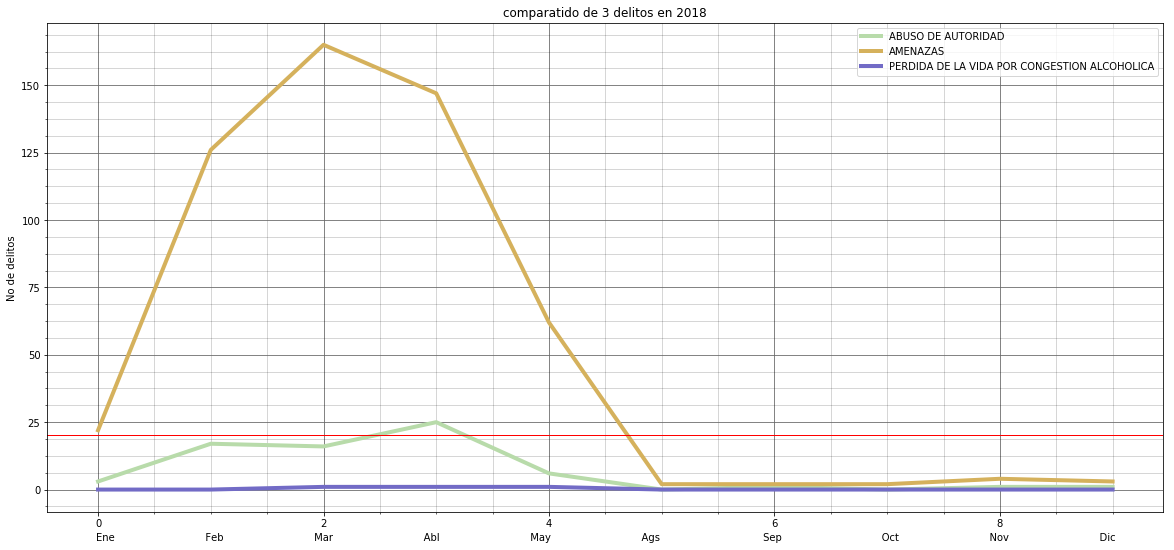

In [15]:
import matplotlib.pyplot as plt
incidencia2 = pd.DataFrame.transpose(Delitosxmes)

deli=[]
i=1
while 0<i and i<177:
    try:
        print(f'Ingresa el ID Delito \ndebe ser un numero entre 1 y {len(dict_columns)} \nque deses agregar a la grafica 2018')
        i=int(input('O un numero negativo para ver la grafica\n'))
    except:
        print("ingresa un numero entre 1 y ", len(dict_columns))
        i=1
        continue
    if 0<i and i<177:
        deli.append(dict_columns[i])

#Las gráficas apreceran automáticamente incrustadas en el notebook
%matplotlib inline

# Definir los datos eje x, eje y
#incidencia = pd.DataFrame.transpose(Delitosxmes.loc[['ABANDONO DE PERSONA'], :])
incidencia = incidencia2[deli]

horas = list(range(len(incidencia)))

# gráfico
# Configurar las caracteristicas del grafico
i=[-1]
def suma():
    i[0]=i[0]+1
    return i[0]

plt.figure(figsize=(20,9))
for h in range(len(deli)):    
    plt.plot(horas, incidencia[deli[h]], label = deli[h], linewidth = 4, color = (random.random(), random.random(), random.random()))
plt.axhline(y=np.mean(incidencia.mean()), linewidth=1, color='r')
#Definir nombres de ejes y titulo
plt.xlabel('Ene                             Feb                             Mar                             Abl                             '
           'May                             Ags                                 Sep                                Oct                             '
           'Nov                             Dic')
plt.ylabel('No de delitos')
plt.title(f'comparatido de {len(deli)} delitos en 2018')
#Mostrar leyenda, cuadricula y figura
plt.legend()
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='black', linestyle='-', alpha=0.2)
plt.show()

